# Ensemble Methods


In this notebook, we delve into the realm of ensemble algorithms, a powerful technique in machine learning. Ensembles combine multiple models to achieve better predictive performance than any individual model alone. Through this exploration, we'll uncover the principles behind ensemble methods, explore various ensemble techniques, and demonstrate their application on diverse datasets. Join us as we unravel the intricacies of ensemble learning and harness its potential to enhance the accuracy and robustness of our predictive models.


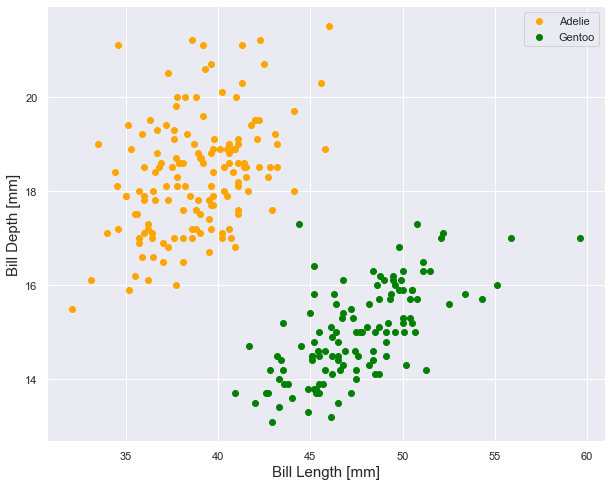

In [1]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting.
sns.set_theme()

# Import the penguin dataset.
penguins = sns.load_dataset("penguins")

# Drop rows with missing values.
penguins = penguins.dropna()

# Extract features.
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define a function to label species.
def make_labels(species):
    """Assigns labels to penguin species."""
    if species == "Adelie":
        return 0
    elif species == "Gentoo":
        return 1
    else:
        return 2

# Create target array using the labeling function.
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data.
species_names = ["Adelie", "Gentoo"]
colors = ["orange", "green"]

# Create the plot.
fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(species_names, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c=color,
               label=species)

# Set labels and legend.
ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend()

# Display the plot.
plt.show()

In [32]:
# Import necessary libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.4, 
                                                    random_state=9)

# Initialize classifiers for logistic regression, random forest, and support vector machine.
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Create the voting classifier using hard voting.
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
    voting="hard"
)

# Fit and evaluate each classifier separately.
# Fit and evaluate the Support Vector Machine classifier.
svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"SVM accuracy: {accuracy_score(y_test, svm_y_predict)}")

# Fit and evaluate the Logistic Regression classifier.
log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"Logistic Regression accuracy: {accuracy_score(y_test, log_y_predict)}")

# Fit and evaluate the Random Forest classifier.
rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"Random Forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

# Fit and evaluate the voting classifier.
voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"Voting Classifier accuracy: {accuracy_score(y_test, y_predict)}")



SVM accuracy: 0.9477611940298507
Logistic Regression accuracy: 0.9701492537313433
Random Forest accuracy: 0.9552238805970149
Voting Classifier accuracy: 0.9626865671641791


# 1. Bagging


Bagging, an ensemble machine learning technique, involves generating multiple base models using different subsets of the training data and then combining their predictions through majority voting. This method is beneficial when the base models exhibit high variance and are prone to overfitting, as averaging their predictions helps mitigate overall variance in the model.

To construct a bagging ensemble on multiple models, we employ the following bootstrapping procedure:

Instantiate several machine learning models.
For each model, train it on a random subset of the training data, with replacement.
For prediction with the ensemble, we utilize the following aggregation procedure:

Utilize each of the trained models to make a prediction.
Average the predictions of all models to obtain the single final output of the bagging ensemble.

In [33]:
# Import necessary libraries.
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

# Instantiate and train a Decision Stump Classifier.
stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
# Predict using the stump classifier.
stump_y_pred = stump_clf.predict(X_test)
# Display the classification report for the stump classifier.
print("Stump Classification Report:")
print(classification_report(y_test, stump_y_pred), "\n")

# Instantiate and train a Decision Tree Classifier.
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
# Predict using the decision tree classifier.
tree_y_pred = tree_clf.predict(X_test)
# Display the classification report for the decision tree classifier.
print("Tree Classification Report:")
print(classification_report(y_test, tree_y_pred), "\n")



Stump Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      0.89      0.91        53
   Chinstrap       0.00      0.00      0.00        30
      Gentoo       0.60      0.98      0.74        51

    accuracy                           0.72       134
   macro avg       0.51      0.62      0.55       134
weighted avg       0.60      0.72      0.64       134
 

Tree Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        53
   Chinstrap       0.78      0.93      0.85        30
      Gentoo       0.96      0.94      0.95        51

    accuracy                           0.93       134
   macro avg       0.91      0.93      0.92       134
weighted avg       0.94      0.93      0.93       134
 



/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [34]:
# Importing necessary libraries for evaluation and ensemble learning.
from sklearn.metrics import classification_report  
from sklearn.ensemble import BaggingClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  

# Splitting the dataset into training and testing sets with a 60-40 split and a fixed random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

# Creating a Bagging Classifier with a Decision Tree base estimator, using 500 estimators, enabling bootstrap sampling, and utilizing all available CPU cores.
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators=500,
                            bootstrap=True,
                            n_jobs=-1)
# Fitting the Bagging Classifier to the training data.
bag_clf.fit(X_train, y_train)
# Making predictions on the test data using the trained Bagging Classifier.
bag_y_pred = bag_clf.predict(X_test)
# Displaying the classification report, providing evaluation metrics such as precision, recall, and F1-score for each class.
print("Bagging Classification Report:")
print(classification_report(y_test, bag_y_pred), "\n")



Bagging Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      0.89      0.91        53
   Chinstrap       0.00      0.00      0.00        30
      Gentoo       0.60      0.98      0.74        51

    accuracy                           0.72       134
   macro avg       0.51      0.62      0.55       134
weighted avg       0.60      0.72      0.64       134
 



/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


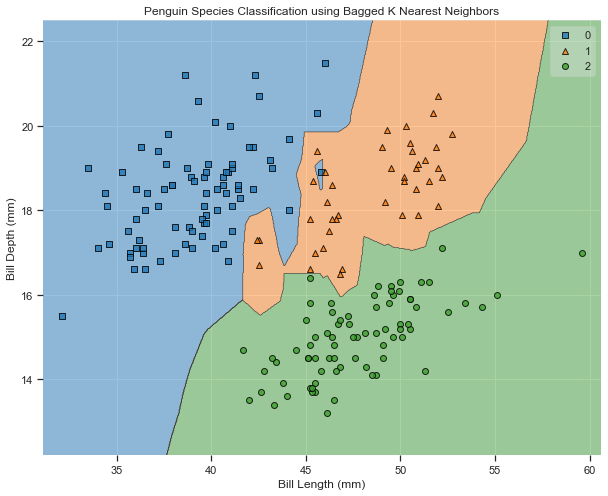

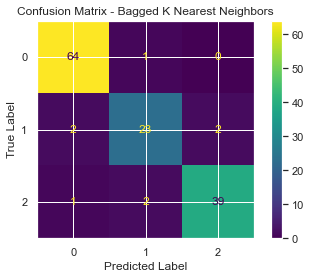

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.88      0.85      0.87        27
           2       0.95      0.93      0.94        42

    accuracy                           0.94       134
   macro avg       0.93      0.92      0.93       134
weighted avg       0.94      0.94      0.94       134



In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay

# Loading the Palmer Penguins dataset.
penguins = pd.read_csv("palmer_penguins.csv")

# Removing rows with missing values.
penguins.dropna(inplace=True)

# Instantiating LabelEncoder and encoding target variable into integer labels.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(penguins["species"])

# Extracting features into X.
X = penguins[['bill_length_mm', 'bill_depth_mm']].values

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initializing KNN classifier with 1 neighbor.
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Initializing BaggingClassifier with KNN base estimator.
# Using bootstrapping for sampling, with 500 estimators and utilizing all available CPU cores.
# Setting random state for reproducibility.
bagged_knn = BaggingClassifier(base_estimator=knn_classifier, n_estimators=500,
                                bootstrap=True, n_jobs=-1, random_state=0)
bagged_knn.fit(X_train, y_train)

# Plotting decision regions.
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, clf=bagged_knn)
plt.title("Penguin Species Classification using Bagged K Nearest Neighbors")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Making predictions on testing data.
predictions = bagged_knn.predict(X_test)

# Calculating confusion matrix and plotting it.
conf_matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Bagged K Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Printing classification report.
print(classification_report(y_test, predictions))


# Bagging decision tree

Bagging with Decision Trees is a powerful ensemble learning technique that combines multiple decision tree models to make more accurate predictions. In bagging, several decision tree models are trained on different subsets of the training data, and their predictions are aggregated through a voting mechanism. This approach helps reduce overfitting and improves the overall performance of the model

/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


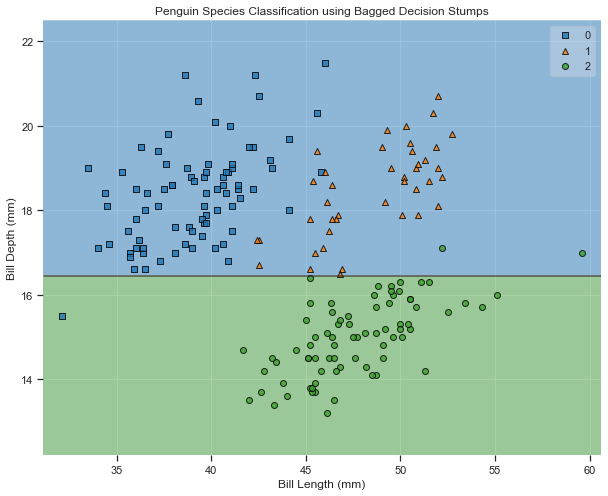

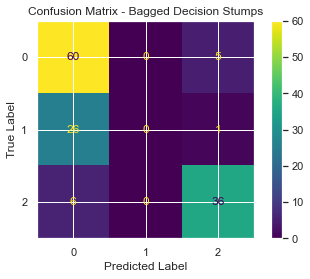

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        65
           1       0.00      0.00      0.00        27
           2       0.86      0.86      0.86        42

    accuracy                           0.72       134
   macro avg       0.50      0.59      0.54       134
weighted avg       0.59      0.72      0.64       134



/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Build a bagging ensemble with decision tree classifiers.
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                n_estimators=500,
                                bootstrap=True,
                                n_jobs=-1,
                                random_state=0)
bagged_tree.fit(X_train, y_train)

# Plot decision boundaries.
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, clf=bagged_tree)
plt.title("Penguin Species Classification using Bagged Decision Stumps")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Make predictions on the testing data.
predictions = bagged_tree.predict(X_test)

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Bagged Decision Stumps")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display classifier metrics.
print(classification_report(y_test, predictions))




Based on the provided classification report, the classifier appears to perform poorly for class 1 (with a label of 1), as indicated by the low precision, recall, and F1-score values for this class. Here's a brief explanation of the metrics:

Precision: Precision measures the proportion of true positive predictions among all instances predicted as positive. For class 1, the precision is 0.00, indicating that none of the instances predicted as class 1 were actually true positives. This suggests that the classifier incorrectly classified all instances of class 1.
Recall: Recall measures the proportion of true positive predictions among all actual positive instances. For class 1, the recall is 0.00, indicating that none of the actual positive instances of class 1 were correctly identified by the classifier.
F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 1, the F1-score is 0.00, reflecting the poor performance of the classifier in correctly identifying instances of this class.
Support: Support indicates the number of actual occurrences of each class in the test set. In this case, there were 27 instances of class 1 in the test set.
Overall, the classifier's inability to correctly classify instances of class 1 (low precision, recall, and F1-score) contributes to its poor performance. This suggests that the classifier struggles to distinguish class 1 from the other classes in the dataset.

The classifier's poor performance for class 1 could be due to:

Class Imbalance: Class 1 might be underrepresented in the training data, making it harder for the classifier to learn its characteristics.
Feature Relevance: The features used may not effectively distinguish class 1 from others.
Model Complexity: The decision tree classifier may be too simple to capture complex patterns in the data.
Bagging Ensemble Parameters: Parameters like the number of estimators and tree depth may not be optimized for the dataset.
Data Quality: Noise or inconsistencies in the data could hinder the classifier's performance.

# Random Forest
Random forests provide an alternative method for constructing ensemble models. They operate akin to bootstrap-aggregated decision trees but incorporate random feature selection. Unlike traditional bagged decision trees, random forests randomly select features for branching during the training of each decision tree. This randomness reduces the similarity between individual trees in the ensemble, thereby decreasing the correlation among their predictions. As a result, random forests mitigate the likelihood of multiple trees making the same errors, thereby enhancing overall performance.

To further explore this concept, we'll create a random forest consisting of 500 decision stumps for comparison with the bagged decision tree method.

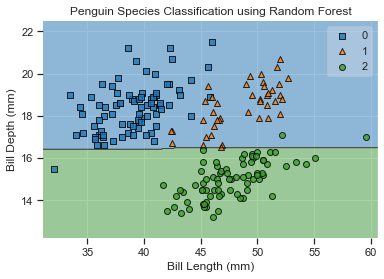

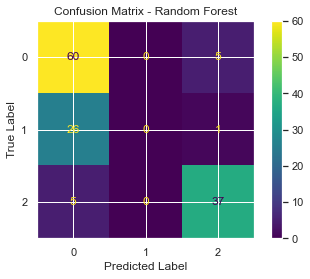

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        65
           1       0.00      0.00      0.00        27
           2       0.86      0.88      0.87        42

    accuracy                           0.72       134
   macro avg       0.51      0.60      0.55       134
weighted avg       0.59      0.72      0.65       134



/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [38]:
# Import the necessary libraries for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Encode the string labels into integers.
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Build a random forest classifier with specific hyperparameters.
random_forest = RandomForestClassifier(n_estimators=500,
                                       max_depth=1,
                                       random_state=0,
                                       bootstrap=True,
                                       n_jobs=-1)
random_forest.fit(X_train, y_train_encoded)

# Plot the decision boundaries for the random forest classifier.
plot_decision_regions(X_train, y_train_encoded, clf=random_forest)
plt.title("Penguin Species Classification using Random Forest")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Make predictions on the testing data using the trained random forest model.
predictions = random_forest.predict(X_test)

# Decode the integer predictions back to the original labels.
y_pred_original = encoder.inverse_transform(predictions)

# Calculate the confusion matrix to evaluate the model performance.
conf_matrix = confusion_matrix(y_test, y_pred_original)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display the classification report containing precision, recall, and F1-score.
print(classification_report(y_test, y_pred_original))



Based on these metrics:

Adelie and Gentoo penguins have relatively good precision, recall, and F1-scores, indicating that the classifier performs reasonably well for these classes.
Chinstrap penguins, however, have poor performance with very low precision, recall, and F1-score. This suggests that the classifier struggles to correctly identify Chinstrap penguins.
Overall, the accuracy of 0.72 indicates that the classifier correctly predicts the penguin species about 72% of the time. However, it's important to consider the specific requirements and context of your application to determine whether this performance is acceptable or not. If accurate identification of all penguin species is crucial, then further improvement may be needed, particularly for Chinstrap penguins.

## Boosted random forests
Our final ensemble technique involves boosted random forests, which are enhancements to traditional random forests but come with the risk of overfitting.

In gradient-boosted random forests, each tree is trained on the residuals of the previous trees, aiming to mitigate the errors made by the preceding trees. This approach enhances predictive capability, although it may lead to overfitting as the modeling progresses.

On the other hand, Ada-boosted random forests utilize adaptive boosting to train decision trees within the ensemble. Here, each tree is trained on a weighted version of the training data, with the weights adjusted based on the performance of earlier trees.

While gradient-boosted random forests typically offer higher accuracy, Ada-boosted random forests are comparatively simpler to implement.

- ### Gradient-Boosted Random Forest


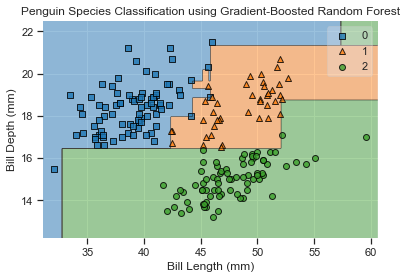

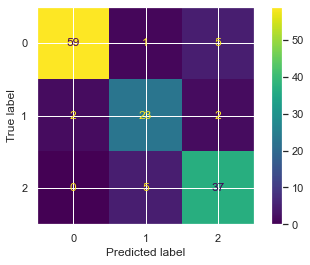

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        65
           1       0.79      0.85      0.82        27
           2       0.84      0.88      0.86        42

    accuracy                           0.89       134
   macro avg       0.87      0.88      0.87       134
weighted avg       0.89      0.89      0.89       134



In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable y_train and y_test.
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Build gradient-boosted random forest classifier.
gbrf = GradientBoostingClassifier(n_estimators=500, 
                                  learning_rate=0.1,
                                  max_depth=1, 
                                  random_state=0)
gbrf.fit(X_train, y_train_encoded)

# Plot decision boundaries.
plot_decision_regions(X_train, y_train_encoded, clf=gbrf)
plt.title("Penguin Species Classification using Gradient-Boosted Random Forest")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Make predictions on testing data.
prediction = gbrf.predict(X_test)

# Generate confusion matrix.
conf_matrix = confusion_matrix(y_test_encoded, prediction)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.show()

# Display classifier metrics.
print(classification_report(y_test_encoded, prediction))



- ### Ada-Boosted Random Forest

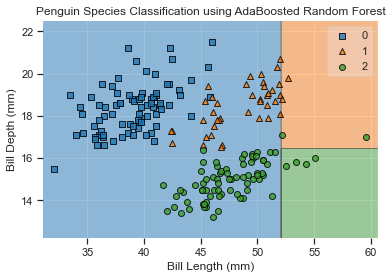

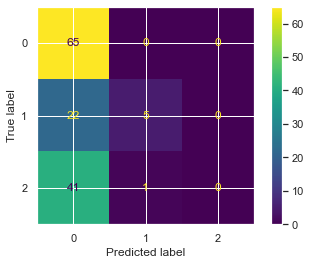

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        65
           1       0.83      0.19      0.30        27
           2       0.00      0.00      0.00        42

    accuracy                           0.52       134
   macro avg       0.45      0.40      0.33       134
weighted avg       0.41      0.52      0.39       134



/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Build ada-boosted random forest classifier.
abrf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=500,
                            random_state=0)
abrf.fit(X_train, y_train_encoded)

# Plot decision boundaries.
plot_decision_regions(X_train, y_train_encoded, clf=abrf)
plt.title("Penguin Species Classification using AdaBoosted Random Forest")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Make predictions on testing data.
prediction = abrf.predict(X_test)

# Generate confusion matrix.
conf_matrix = confusion_matrix(y_test_encoded, prediction)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.show()

# Display classifier metrics.
print(classification_report(y_test_encoded, prediction))



The results from the AdaBoost classifier indicate poor performance across all classes. This could be due to several reasons:

Imbalanced Classes: The classes may be imbalanced, leading to biased predictions. In this case, Class 0 has a significantly larger support than Classes 1 and 2, which can affect the classifier's ability to generalize.
Weak Learner Choice: AdaBoost relies on weak learners (typically shallow decision trees) to fit the data. If the weak learner is too weak or too complex, it may not generalize well to unseen data. In this case, using decision trees with a max_depth of 1 might be too simplistic or not suitable for the dataset.
Overfitting: AdaBoost can suffer from overfitting if the base learner is too complex or if the number of estimators (trees) is too high. Overfitting occurs when the model learns the noise in the training data instead of the underlying patterns.
Insufficient Data: The dataset may be too small for AdaBoost to learn meaningful patterns. With a small dataset, it's challenging for the model to capture the variability in the data and generalize well to unseen samples.
To improve performance, you could try:

Experimenting with different weak learner parameters (e.g., max_depth of decision trees).
Tuning the number of estimators (n_estimators) to find the right balance between bias and variance.
Addressing class imbalance through techniques like oversampling, undersampling, or using class weights.
Collecting more data if possible to provide the model with more information to learn from.
Additionally, it's essential to analyze the data further to understand its characteristics and potential challenges that may affect the performance of the AdaBoost classifier.

- ### Deeper gradient boosted Random Forest


If we construct a gradient-boosted random forest using trees with a depth of 3 instead of decision stumps, we anticipate an increase in predictive accuracy, but we need to be extra vigilant about the risk of overfitting.

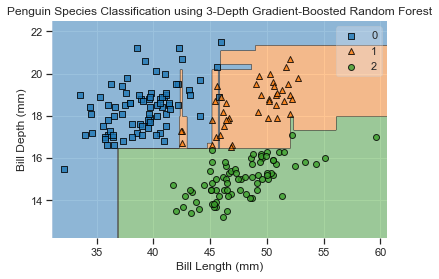

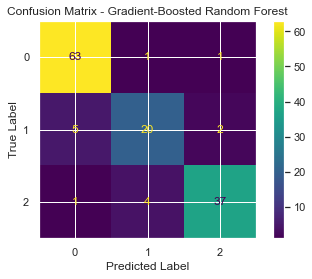

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.80      0.74      0.77        27
           2       0.93      0.88      0.90        42

    accuracy                           0.90       134
   macro avg       0.88      0.86      0.87       134
weighted avg       0.89      0.90      0.89       134



In [41]:
# Import the necessary libraries for the task.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Encode the target variable to facilitate model training.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Build the gradient-boosted random forest classifier with specified parameters.
dgbrf = GradientBoostingClassifier(n_estimators=500, 
                                   learning_rate=0.1,
                                   max_depth=3, 
                                   random_state=0)
dgbrf.fit(X_train, y_train_encoded)

# Plot the decision boundaries to visualize the classifier's behavior.
plot_decision_regions(X_train, y_train_encoded, clf=dgbrf)
plt.title("Penguin Species Classification using 3-Depth Gradient-Boosted Random Forest")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Make predictions on the testing data.
prediction_encoded = dgbrf.predict(X_test)

# Convert the encoded predictions back to the original labels.
prediction = le.inverse_transform(prediction_encoded)

# Calculate and display the confusion matrix to assess classifier performance.
conf_matrix = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Gradient-Boosted Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Provide a detailed report on the classifier's performance using various metrics.
print(metrics.classification_report(y_test, prediction))



Based on the provided outcomes, the gradient-boosted random forest algorithm demonstrates overall good performance across multiple evaluation metrics.

- **Precision**: The algorithm achieves high precision for class 0 (91%), indicating that when it predicts a sample as class 0, it is correct 91% of the time. For class 2, the precision is also high at 93%, suggesting accurate predictions for this class as well. However, the precision for class 1 is relatively lower at 80%, indicating that there may be some misclassification errors when predicting class 1.  

- **Recall**: The recall values indicate the algorithm's ability to correctly identify instances of each class. Class 0 and class 2 exhibit high recall values of 97% and 88%, respectively, indicating that the algorithm effectively captures the majority of instances belonging to these classes. However, the recall for class 1 is 74%, suggesting that the algorithm misses some instances of class 1 during prediction.  

- **F1-score**: The F1-score balances both precision and recall and provides a single metric to assess the algorithm's performance. The F1-scores for class 0, class 1, and class 2 are 0.94, 0.77, and 0.90, respectively. These scores indicate good overall performance, with class 0 and class 2 achieving higher F1-scores compared to class 1.  

- **Accuracy**: The overall accuracy of the algorithm is 90%, indicating that it correctly predicts the class labels for 90% of the samples in the test set.  

In summary, the gradient-boosted random forest algorithm demonstrates strong predictive ability, particularly for classes 0 and 2, while showing slightly lower performance for class 1. Further optimization or tuning may be beneficial to improve the algorithm's performance, especially for class 1 predictions.